In [9]:
""" Import libraries """

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import pandas as pd
import os

In [10]:
# Output directory
output_dir = "Lesson_07"
os.makedirs(output_dir, exist_ok=True)

In [11]:
# === Abrir datasets ===
ds_tcw = xr.open_dataset('/N/project/easg690_fall2025/data/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc')
ds_mslp = xr.open_dataset('/N/project/easg690_fall2025/data/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_151_msl.ll025sc.2021060100_2021063023.nc')

ds_tcw 

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 720, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 6kB 2021-06-01 ... 2021-06-30T23:00:00
Data variables:
    TCW        (time, latitude, longitude) float32 3GB ...
    utc_date   (time) int32 3kB ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r4i1n35 4.12.14-95.51-default #1 SMP Fri Apr ...
    CONVERSION_DATE:      Fri Sep  3 11:04:41 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Sep  3 11:04:57 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

In [12]:
ds_mslp

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 720, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 6kB 2021-06-01 ... 2021-06-30T23:00:00
Data variables:
    MSL        (time, latitude, longitude) float32 3GB ...
    utc_date   (time) int32 3kB ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r4i1n35 4.12.14-95.51-default #1 SMP Fri Apr ...
    CONVERSION_DATE:      Fri Sep  3 11:16:47 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Sep  3 11:17:04 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

In [17]:
# Selected time index
i = 48
tcw = ds_tcw["TCW"].isel(time=i)
mslp = ds_mslp["MSL"].isel(time=i) / 100  # Convert Pa to hPa

# Extract time as datetime
time = pd.to_datetime(tcw.time.values)

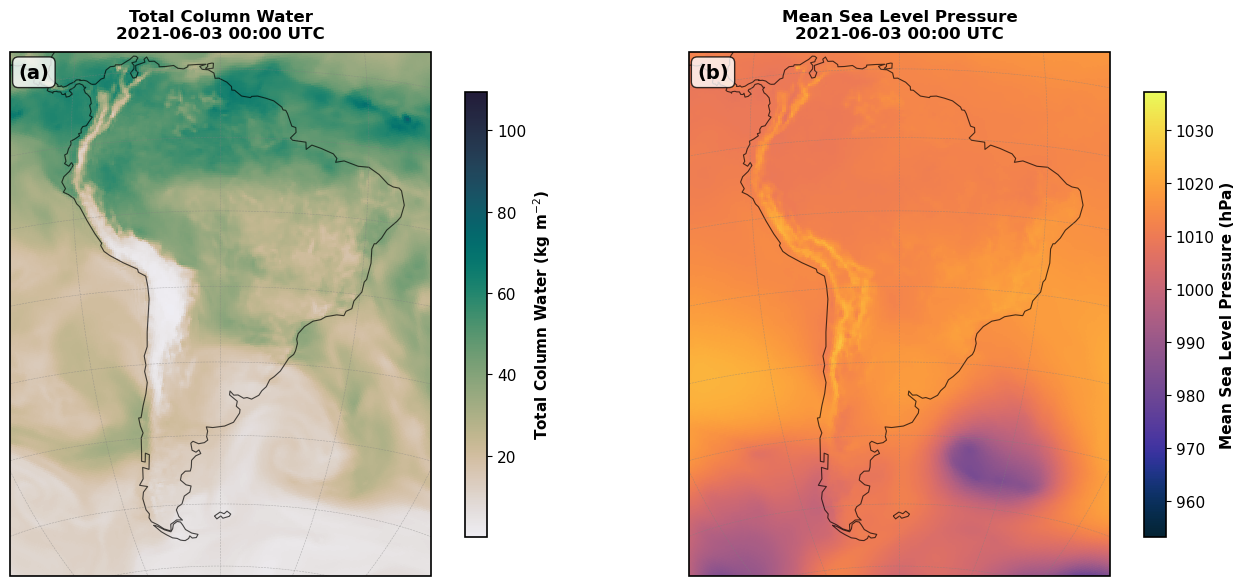

✅ Figura salva em: Lesson_07/panel_tcw_mslp_00048.png


In [19]:
# ==========================
# === Map Configuration
# ==========================
# Orthographic projection centered over South America
clon, clat = -60, -20
projection = ccrs.Orthographic(clon, clat)
extent = [-90, -30, -60, 15]

# Publication Quality - Nice plot"
plt.rcParams.update({
    "font.size": 11,
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "axes.linewidth": 1.2,
    "font.family": "sans-serif"
})

# ==========================
# === Plot: Two panels
# ==========================
fig, axes = plt.subplots(
    1, 2, figsize=(14, 6),
    subplot_kw=dict(projection=projection)
)

# === Panel 1: TCW ===
im1 = tcw.plot(
    ax=axes[0],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.rain,
    cbar_kwargs={
        'label': 'Total Column Water (kg m$^{-2}$)',
        'shrink': 0.85,
        'pad': 0.05
    },
    add_colorbar=True
)

axes[0].set_title(f"Total Column Water\n{time.strftime('%Y-%m-%d %H:%M UTC')}", 
                  fontsize=12, pad=10)
axes[0].coastlines(linewidth=0.8, color='black', alpha=0.7)
axes[0].set_extent(extent, crs=ccrs.PlateCarree())
axes[0].gridlines(draw_labels=False, linewidth=0.4, color="gray", alpha=0.5, linestyle='--')

# Add border to the panel
for spine in axes[0].spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Add label (a)
axes[0].text(0.02, 0.98, '(a)', transform=axes[0].transAxes,
            fontsize=14, fontweight='bold', va='top', ha='left',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# === Panel 2: MSLP ===
im2 = mslp.plot(
    ax=axes[1],
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.thermal,
    cbar_kwargs={
        'label': 'Mean Sea Level Pressure (hPa)',
        'shrink': 0.85,
        'pad': 0.05
    },
    add_colorbar=True
)

axes[1].set_title(f"Mean Sea Level Pressure\n{time.strftime('%Y-%m-%d %H:%M UTC')}", 
                  fontsize=12, pad=10)
axes[1].coastlines(linewidth=0.8, color='black', alpha=0.7)
axes[1].set_extent(extent, crs=ccrs.PlateCarree())
axes[1].gridlines(draw_labels=False, linewidth=0.4, color="gray", alpha=0.5, linestyle='--')

# Add border to the panel
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Add label (b)
axes[1].text(0.02, 0.98, '(b)', transform=axes[1].transAxes,
            fontsize=14, fontweight='bold', va='top', ha='left',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()

# ==========================
# === Save and show
# ==========================
output_file = os.path.join(output_dir, f"panel_tcw_mslp_{i:05d}.png")
fig.savefig(output_file, dpi=300, bbox_inches="tight", facecolor='white')
plt.show()

print(f"✅ Figure save in: {output_file}")